## Importación de las librerias necesarias

In [374]:
from binance.client import Client
import requests
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import time 
from datetime import datetime
from ydata_profiling import ProfileReport
import matplotlib.pyplot as plt
from dotenv import load_dotenv
import os

#### Hice mi analisis basandome en distintos articulos de internet, lo que entendi fue que muchos se fijan en el volumen y en el market cap tambien en que estan basados los proyectos atras de las criptomonedas, que tan confiable son, todo lo que se pueda encontrar en articulos, elegi criptomendas muy famosas (no stablecoin porque su precio siempre va a ser 1), tambien elegi solo una moneda que es algo llamado memecoin, pero que ha ganado su popularidad y es querida por la comunidad de internet ()

In [375]:
load_dotenv()
api_key = os.getenv("API_KEY")
api_secret =  os.getenv("SECRET_KEY")
client = Client(api_key, api_secret)
print(client)

##### La funcionalidad de la siguiente linea, tiene en cuenta buscar diferentes criptomonedas dependiendo si contiene ciertos caracteres, estos pueden ser como ADA (Cardano) también BTC y diferentes símbolos de criptomonedas , esta funcion la cree porque tuve la necesidad de buscar las diferentes maneras en como aparecian las monedas que queria usar

In [250]:
prices = client.get_all_tickers()
for i in range(len(prices)):
    prices_Symb = prices[i]["symbol"]
    if (prices_Symb.strip().__contains__("ADA")):
        print(prices_Symb) 

ADABTC
ADAETH
ADAUSDT
ADABNB
ADATUSD
ADAPAX
ADAUSDC
ADABUSD
ADAUPUSDT
ADADOWNUSDT
ADABKRW
ADAEUR
ADATRY
ADABRL
ADAGBP
ADAAUD
ADARUB
ADABIDR


In [345]:
interval = Client.KLINE_INTERVAL_1DAY
symbols = ['BTCUSDT', 'ETHUSDT', 'LTCTUSD', "BNBUSDT", "ADAUSDT", "XRPTUSD", "XLMTUSD", "SOLUSDT", "DOGEUSDT" ]
data_dict = {}

for symbol in symbols:
    klines = client.get_historical_klines(symbol, interval, "1 Jan, 2018", "14 Ago, 2023")
    
    data = pd.DataFrame(klines, columns=["timestamp", "open", "high", "low", "close", "volume", "close_time", "quote_asset_volume", "number_of_trades", "taker_buy_base_asset_volume", "taker_buy_quote_asset_volume", "ignore"])
    data["timestamp"] = pd.to_datetime(data["timestamp"], unit="ms")
    
    data_dict[symbol] = data

# Crear un DataFrame consolidado a partir del diccionario de datos
consolidated_data = pd.concat(data_dict.values(), keys=data_dict.keys())



In [349]:
consolidated_data

timestamp            open            high             low  \
BTCUSDT  0    2018-01-01  13715.65000000  13818.55000000  12750.00000000   
         1    2018-01-02  13382.16000000  15473.49000000  12890.02000000   
         2    2018-01-03  14690.00000000  15307.56000000  14150.00000000   
         3    2018-01-04  14919.51000000  15280.00000000  13918.04000000   
         4    2018-01-05  15059.56000000  17176.24000000  14600.00000000   
...                  ...             ...             ...             ...   
DOGEUSDT 1497 2023-08-10      0.07542000      0.07695000      0.07514000   
         1498 2023-08-11      0.07587000      0.07611000      0.07484000   
         1499 2023-08-12      0.07574000      0.07745000      0.07561000   
         1500 2023-08-13      0.07670000      0.07689000      0.07430000   
         1501 2023-08-14      0.07479000      0.07711000      0.07365000   

                        close              volume     close_time  \
BTCUSDT  0     13380.00000000       8609.91584400  1514851199999   
         1     14675.11000000      20078.09211100  1514937599999   
         2     14919.51000000      15905.66763900  1515023999999   
         3     15059.54000000      21329.64957400  1515110399999   
         4     16960.39000000      23251.49112500  1515196799999   
...                       ...                 ...            ...   
DOGEUSDT 1497      0.07588000  614532410.00000000  1691711999999   
         1498      0.07574000  303787779.00000000  1691798399999   
         1499      0.07670000  588060644.00000000  1691884799999   
         1500      0.07479000  468528019.00000000  1691971199999   
         1501      0.07469000  779632649.00000000  1692057599999   

               quote_asset_volume  number_of_trades  \
BTCUSDT  0     114799747.44197057          105595.0   
         1     279717107.43371920          177728.0   
         2     236116868.33619011          162787.0   
         3     312781583.79830782          170310.0   
         4     369321956.48683753          192969.0   
...                           ...               ...   
DOGEUSDT 1497   46647469.94910000          101988.0   
         1498   22955077.04023000           51419.0   
         1499   45058875.63219000           84459.0   
         1500   35488657.73304000           71384.0   
         1501   58473264.94941000          121040.0   

              taker_buy_base_asset_volume taker_buy_quote_asset_volume ignore  
BTCUSDT  0                  3961.93894600            52809747.44038045      0  
         1                 11346.32673900           158080088.68331682      0  
         2                  8994.95356600           133587333.24534808      0  
         3                 12680.81295100           186116793.01158931      0  
         4                 13346.62229300           211829900.67898224      0  
...                                   ...                          ...    ...  
DOGEUSDT 1497          315622223.00000000            23963156.07543000      0  
         1498          139078876.00000000            10512897.69655000      0  
         1499          316164628.00000000            24231270.74435000      0  
         1500          212851900.00000000            16129110.75621000      0  
         1501          340949124.00000000            25599424.25426000      0  

[13903 rows x 12 columns]

## Transforme los tipos de datos de las diferentes columnas para poder hacer un análisis más a fondo

In [362]:
consolidated_data["taker_buy_quote_asset_volume"] = consolidated_data["taker_buy_quote_asset_volume"].astype("float")

In [372]:
consolidated_data.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 13903 entries, ('BTCUSDT', 0) to ('DOGEUSDT', 1501)
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   timestamp           13903 non-null  datetime64[ns]
 1   open                13903 non-null  float64       
 2   high                13903 non-null  float64       
 3   low                 13903 non-null  float64       
 4   close               13903 non-null  float64       
 5   volume              13903 non-null  float64       
 6   close_time          13903 non-null  int64         
 7   quote_asset_volume  13903 non-null  float64       
 8   number_of_trades    13903 non-null  float64       
dtypes: datetime64[ns](1), float64(7), int64(1)
memory usage: 1.1+ MB


In [367]:
consolidated_data.isnull().sum()

timestamp                       0
open                            0
high                            0
low                             0
close                           0
volume                          0
close_time                      0
quote_asset_volume              0
number_of_trades                0
taker_buy_base_asset_volume     0
taker_buy_quote_asset_volume    0
ignore                          0
dtype: int64

In [369]:
consolidated_data.drop(columns="ignore", inplace=True)

In [370]:
consolidated_data.drop(columns="taker_buy_base_asset_volume", inplace=True)     

In [371]:
consolidated_data.drop(columns="taker_buy_quote_asset_volume", inplace=True)     

#### Como podemos ver cuando el bitcoin tuvo el volumen mas alto de todas las criptos fue cuando alcanzo su pico de precio, ya que en este momento fue donde todos hablaban de las criptomonedas, de los juegos nft, fue una epoca donde el mundo digital entro en revuelo, y donde todos querian entrar, tanto en criptomonedas, como trading, como NFT (Tokens No Fungible)

In [268]:
consolidated_data[consolidated_data["volume"] == consolidated_data["volume"].max()]

,,timestamp,open,high,low,close,volume,close_time,quote_asset_volume,number_of_trades,taker_buy_base_asset_volume,taker_buy_quote_asset_volume,ignore
BTCUSDT,1409,2021-11-10,66947.67,69000.0,62822.9,64882.43,69000.0,1636588799999,4.335576e+09,2347934.0,31344.74332100,2088305177.77747838,0


In [269]:
consolidated_data.index

MultiIndex([( 'BTCUSDT',    0),
            ( 'BTCUSDT',    1),
            ( 'BTCUSDT',    2),
            ( 'BTCUSDT',    3),
            ( 'BTCUSDT',    4),
            ( 'BTCUSDT',    5),
            ( 'BTCUSDT',    6),
            ( 'BTCUSDT',    7),
            ( 'BTCUSDT',    8),
            ( 'BTCUSDT',    9),
            ...
            ('DOGEUSDT', 1492),
            ('DOGEUSDT', 1493),
            ('DOGEUSDT', 1494),
            ('DOGEUSDT', 1495),
            ('DOGEUSDT', 1496),
            ('DOGEUSDT', 1497),
            ('DOGEUSDT', 1498),
            ('DOGEUSDT', 1499),
            ('DOGEUSDT', 1500),
            ('DOGEUSDT', 1501)],
           length=13903)

### Las siguientes funciones son metricas que obtuve de internet, me ayude en la construcción un poco con CHATGPT para poder entender bien ciertas funciones que no sabia que existian en PANDAS como ewm y rolling

# EMA


In [293]:
def EMA(symbol, periodico):
    df = consolidated_data.loc[symbol].copy()
    df[f'EMA_{periodico}'] = df['close'].ewm(span=periodico, adjust=False).mean()
    
    plt.figure(figsize=(10, 6))
    plt.plot(df['timestamp'], df['close'], label='Precio de Cierre')
    plt.plot(df['timestamp'], df[f'EMA_{periodico}'], label=f'EMA {periodico} días')
    plt.xlabel('Fecha')
    plt.ylabel('Precio')
    plt.title(f'EMA de {periodico} días')
    plt.legend()
    plt.show()

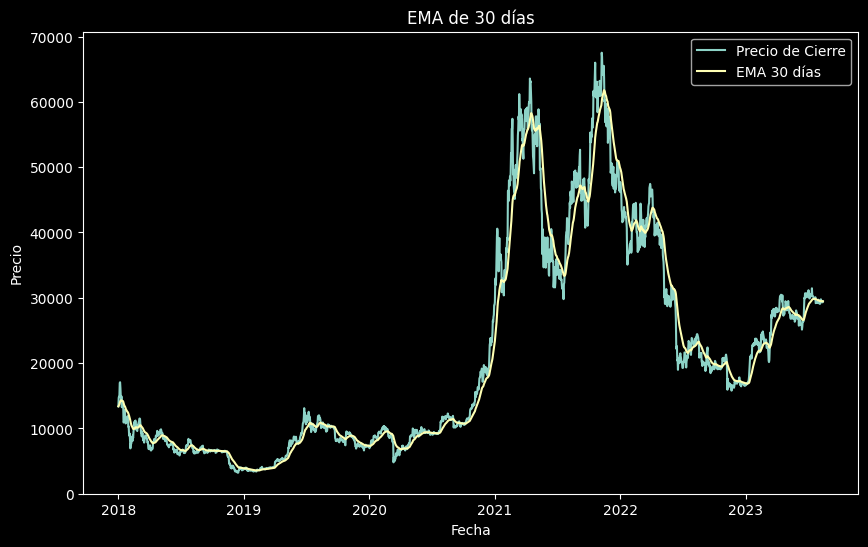

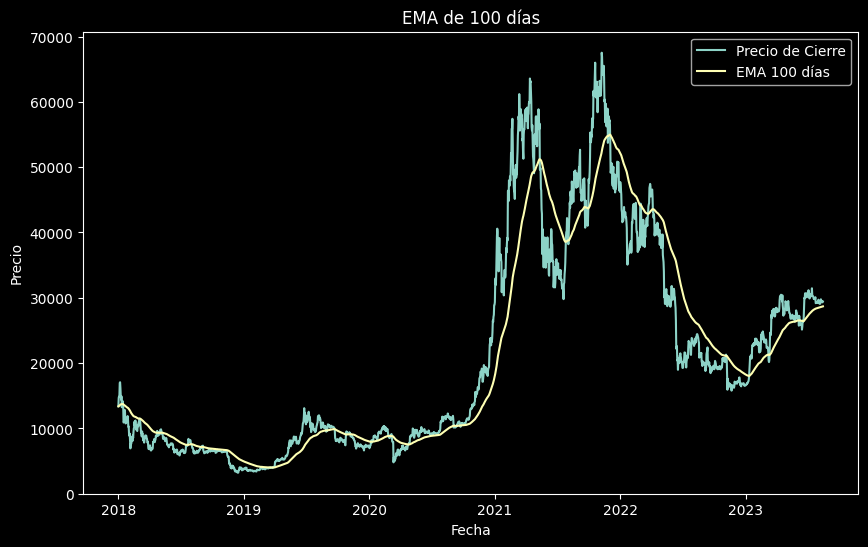

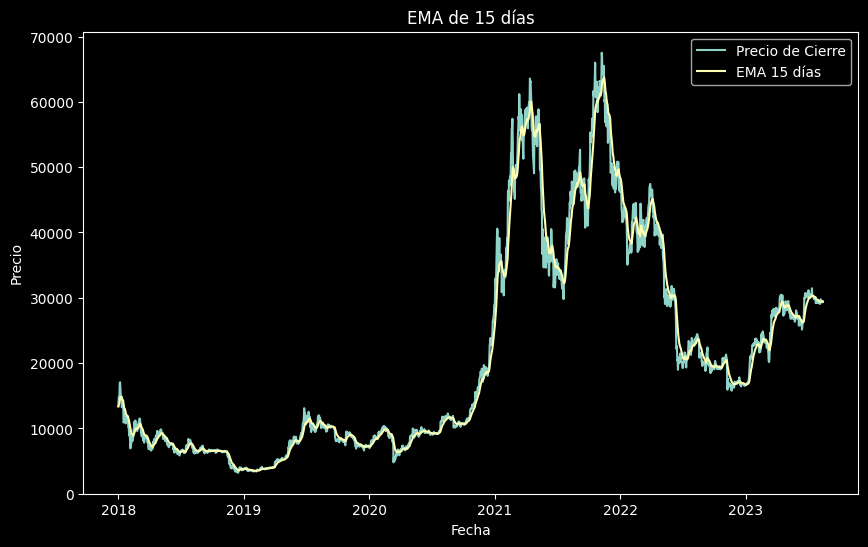

In [294]:
EMA("BTCUSDT", 30)
EMA("BTCUSDT", 100)
EMA("BTCUSDT", 15)

# SMA

In [295]:
def SMA(symbol, periodico):
    df = consolidated_data.loc[symbol].copy()
    df['SMA'] = df['close'].rolling(window=periodico).mean()
    plt.figure(figsize=(10, 6))
    plt.plot(df['timestamp'], df['close'], label='Precio de Cierre')
    plt.plot(df['timestamp'], df['SMA'], label=f'SMA {periodico} días')
    plt.xlabel('Fecha')
    plt.ylabel('Precio')
    plt.title(f'SMA de {periodico} días')
    plt.legend()
    plt.show()

## RSI

In [331]:
def RSI(symbol):
    sma_period = 14  # Número de períodos para el promedio
    df = consolidated_data.loc[symbol].copy()
    df["Price Change"] = df["close"].diff()
    df["Positive Change"] = df["Price Change"].apply(lambda x: x if x > 0 else 0)
    df["Negative Change"] = df["Price Change"].apply(lambda x: -x if x < 0 else 0)
    df['Avg Gain'] = df['Positive Change'].rolling(window=sma_period).mean()
    df['Avg Loss'] = df['Negative Change'].rolling(window=sma_period).mean()
    df['RS'] = df['Avg Gain'] / df['Avg Loss']
    df.fillna(0, inplace=True)
    df['RSI'] = 100 - (100 / (1 + df['RS']))
    
    return df

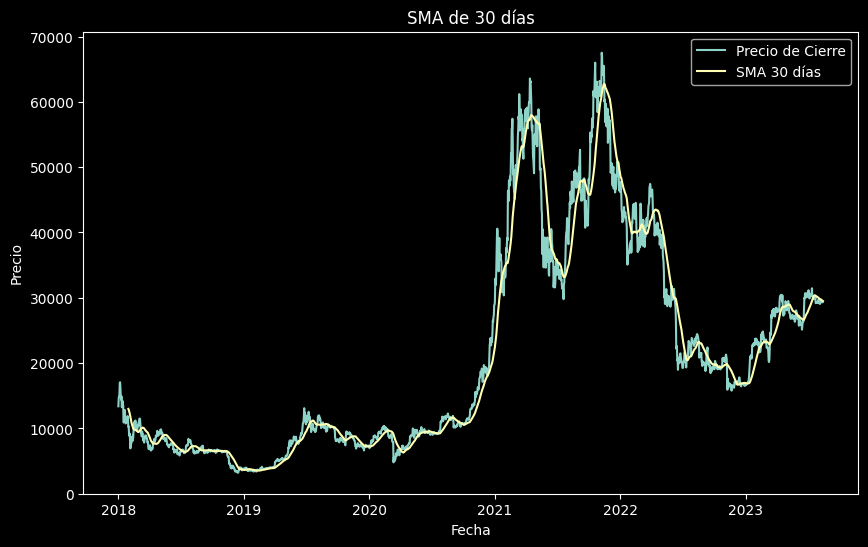

In [340]:
SMA("BTCUSDT", 30)

## RSI
Por defecto, el RSI mide los cambios en el precio de un activo a lo largo de 14 periodos. La fórmula divide la ganancia media que el precio ha tenido a lo largo de ese tiempo, por la pérdida media que ha soportado, y a continuación plasma dicha fuerza en una escala de ajuste entre 0 y 100. 
El RSI es también un indicador de oscilación que facilita a los traders la detección de condiciones de mercado de sobrecompra o sobreventa. Evalúa el precio del activo en una escala que va de 0 a 100, teniendo en cuenta los 14 periodos. Mientras un nivel de 30 o menos en el RSI sugiere que el activo está probablemente cerca de su suelo (sobrevendido), una medición por encima de 70 sugiere que el precio del activo está cerca de su techo (sobrecomprado) para ese periodo de tiempo, y muy probablemente caerá.

RSI por debajo de 30: Un RSI por debajo de 30 generalmente se considera una señal de sobreventa. Esto podría indicar que el activo ha caído demasiado rápido y puede haber una posible reversión alcista en el futuro. Algunos traders podrían considerar esto como una oportunidad de compra.

RSI por encima de 70: Un RSI por encima de 70 generalmente se considera una señal de sobrecompra. Esto podría indicar que el activo ha subido demasiado rápido y puede haber una posible reversión bajista en el futuro. Algunos traders podrían considerar esto como una señal de venta.

In [342]:
RSI("DOGEUSDT")

,timestamp,open,high,low,close,volume,close_time,quote_asset_volume,number_of_trades,taker_buy_base_asset_volume,taker_buy_quote_asset_volume,ignore,SMA,Price Change,Positive Change,Negative Change,Avg Gain,Avg Loss,RS,RSI
0,2019-07-05,0.004490,0.004600,0.003550,0.003870,0.004600,1562371199999,7.506289e+06,18589.0,858403324.00000000,3336426.01151920,0,21.848387,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,2019-07-06,0.003874,0.003943,0.003365,0.003500,0.003943,1562457599999,3.692804e+06,17250.0,522724122.00000000,1908499.50964960,0,19.528737,-0.000370,0.000000,0.000370,0.000000,0.000000,0.000000,0.000000
2,2019-07-07,0.003504,0.003650,0.003400,0.003538,0.003650,1562543999999,1.860353e+06,9394.0,275110757.00000000,965093.40977300,0,17.217091,0.000038,0.000038,0.000000,0.000000,0.000000,0.000000,0.000000
3,2019-07-08,0.003538,0.003562,0.003400,0.003458,0.003562,1562630399999,1.078072e+06,4958.0,159456967.00000000,558024.17586270,0,14.795437,-0.000080,0.000000,0.000080,0.000000,0.000000,0.000000,0.000000
4,2019-07-09,0.003462,0.003582,0.003356,0.003455,0.003582,1562716799999,8.785283e+05,5690.0,115809520.00000000,402047.29506700,0,12.357782,-0.000004,0.000000,0.000004,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1497,2023-08-10,0.075420,0.076950,0.075140,0.075880,0.076950,1691711999999,4.664747e+07,101988.0,315622223.00000000,23963156.07543000,0,0.074919,0.000470,0.000470,0.000000,0.000566,0.000690,0.820911,45.082433
1498,2023-08-11,0.075870,0.076110,0.074840,0.075740,0.076110,1691798399999,2.295508e+07,51419.0,139078876.00000000,10512897.69655000,0,0.074678,-0.000140,0.000000,0.000140,0.000566,0.000669,0.847222,45.864662
1499,2023-08-12,0.075740,0.077450,0.075610,0.076700,0.077450,1691884799999,4.505888e+07,84459.0,316164628.00000000,24231270.74435000,0,0.074926,0.000960,0.000960,0.000000,0.000416,0.000669,0.622863,38.380513
1500,2023-08-13,0.076700,0.076890,0.074300,0.074790,0.076890,1691971199999,3.548866e+07,71384.0,212851900.00000000,16129110.75621000,0,0.075047,-0.001910,0.000000,0.001910,0.000416,0.000647,0.643488,39.153794


#### Voy a usar los siguientes coins por la cantidad de volumen que hay en el mercado de las criptos, ya que una alta liquidez en una cripto significa que puede ser comprada o vendida esa moneda y no afectaria tanto el precio de la misma, también voy a usar cardano porque me llamo la atención el proyecto que hay detrás de esto

In [344]:
id_list = ["bitcoin", 'ethereum',  'litecoin', 'binancecoin','cardano', 'ripple','stellar','solana', 'dogecoin' ]

## Empiezo armar funciones para guardar todos los datos extraidos desde coingecko, de una manera más fácil ya que iba a llamar muchas veces diferentes funciones

In [217]:
unique_dates = set()
## ---------------------------------------------------- 
## Transforma los milisegundos devuelto por la api en formato date 
def date_transform(milisegundos):
    
    segundos = milisegundos / 1000
    
    s = time.gmtime(segundos)
    format = time.strftime("%Y-%m-%d", s)

    date_object = datetime.strptime(format, "%Y-%m-%d").date()
    
    return date_object.isoformat()

## ---------------------------------------------------- 
## Agregar al diccionario el precio de cada moneda dependiendo la cantidad de dia que queremos ver
def obtener_days_coin(id_list , days, dict : dict ):
    for i in range (len(id_list)):
        url =  f"https://api.coingecko.com/api/v3/coins/{id_list[i]}/market_chart?vs_currency=usd&days={days}"
        req = requests.get(url)
        json_coin = req.json()
        price_dict = json_coin["prices"]
        dict.__setitem__(f"{id_list[i]}",[])
        length_of_price = len(price_dict)
        print(length_of_price)
        for j in range(length_of_price) : 
            milisegundos = price_dict[j][0]
            price = round(json_coin["prices"][j][1],5)
            dict[f"{id_list[i]}"].append(price)
            date_object = date_transform(milisegundos)
            unique_dates.add(date_object)

##
def agregar_date_diccionario(dict_agg : dict):
    sorted_dates = sorted(list(unique_dates), reverse=False)
    for date in sorted_dates:
        if date not in dict_agg["Date"]:
            dict_agg["Date"].append(date)


## ---------------------------------------------------- 
## Agrego los zeros que le faltan a las monedas que todavian no salieron en cierta fecha 
def agregar_zeros_al_price(dict_agg : dict):
    len_distancia = len(dict_agg["Date"])        
    for key in dict_agg.keys():
        if  key != "Date" :
            current_length = len(dict_agg[key])
            
            if current_length < len_distancia:
                
                length_to_add = len_distancia - current_length
                
                zeros_to_add = [0] * length_to_add
                
                dict_agg[key] = zeros_to_add + dict_agg[key]
                

## ---------------------------------------------------- 
## Obtener un diccionario historico sobre las monedas que nosotros decidimos
def data_coin(id_list,date_range, dict) :
        obtener_days_coin(id_list,date_range, dict)
        agregar_date_diccionario(dict)
        agregar_zeros_al_price(dict)


    

In [218]:
diccionario_visualizacion = {
    "Date" : []
}


In [219]:
data_coin(id_list, date_range="max", dict=diccionario_visualizacion)

3761
2931
3761
2159
2129
3660
3292
1223
1093


In [220]:
df_hist = pd.DataFrame(diccionario_visualizacion)
df

,Date,bitcoin,ethereum,litecoin,binancecoin,cardano,ripple,stellar,solana,polkadot
0,2013-04-28,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
1,2013-04-29,135.30000,0.00000,4.29983,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
2,2013-04-30,141.96000,0.00000,4.35940,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
3,2013-05-01,135.30000,0.00000,4.18295,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
4,2013-05-02,117.00000,0.00000,3.64914,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
...,...,...,...,...,...,...,...,...,...,...
3757,2023-08-11,29396.84797,1847.54184,83.50801,239.59582,0.29332,0.63162,0.13947,24.57981,5.00286
3758,2023-08-12,29412.14227,1848.50524,83.39957,240.08845,0.29167,0.62708,0.13779,24.89182,5.03236
3759,2023-08-13,29284.96971,1839.51281,81.94623,240.03079,0.28937,0.62569,0.13785,24.22329,4.98481
3760,2023-08-14,29400.58680,1843.51339,82.04350,240.35806,0.29045,0.63468,0.13603,25.14772,4.98630


<Axes: xlabel='Date', ylabel='ethereum'>

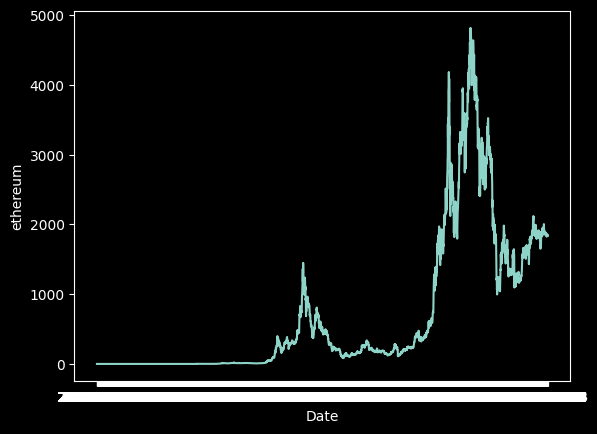

In [141]:
sns.lineplot(data=df_hist, x="Date", y="ethereum")

# Esta parte fue mas de prueba ya que senti que realmente no era necesario usarlo despues de ver los datos pero fue meramente hecho para probar esta librería que me parecio bastante interesante

In [142]:

profile = ProfileReport(df_hist, title='Análisis Exploratorio de Datos')

profile.to_file("analisis_datos.html")

Export report to file: 100%|██████████| 1/1 [00:00<00:00,  4.39it/s]


In [366]:

profile = ProfileReport(consolidated_data, title='Análisis Exploratorio de Datos Total')

profile.to_file("analisis_datos2.html")

Export report to file: 100%|██████████| 1/1 [00:00<00:00, 45.45it/s]


## Por lo que vi es el preció en el que empezó aparecer el bitcoin 

In [373]:
save = df_hist.to_csv("../data/csv/datos_coin.csv", index=False)

NameError: name 'df_hist' is not defined

In [364]:
save2 = consolidated_data.to_csv("../data/csv/datos_total.csv", index=False)